# Visualization of FER model

Inorder to check whether FER model works on the available dataset, plotting few images with their outputs. This model and weights are from https://github.com/WuJie1010/Facial-Expression-Recognition.Pytorch The github project is cloned and modified to fit the required needs.

C:\Users\vijet\Projects\MSc\mustard++\Facial-Expression-Recognition.Pytorch-master\transforms\functional.py:63: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2126939028.py:51: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(inputs, volatile=True)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2126939028.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  score = F.softmax(outputs_avg)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2126939028.py:87: UserWarning: The figure layout has ch

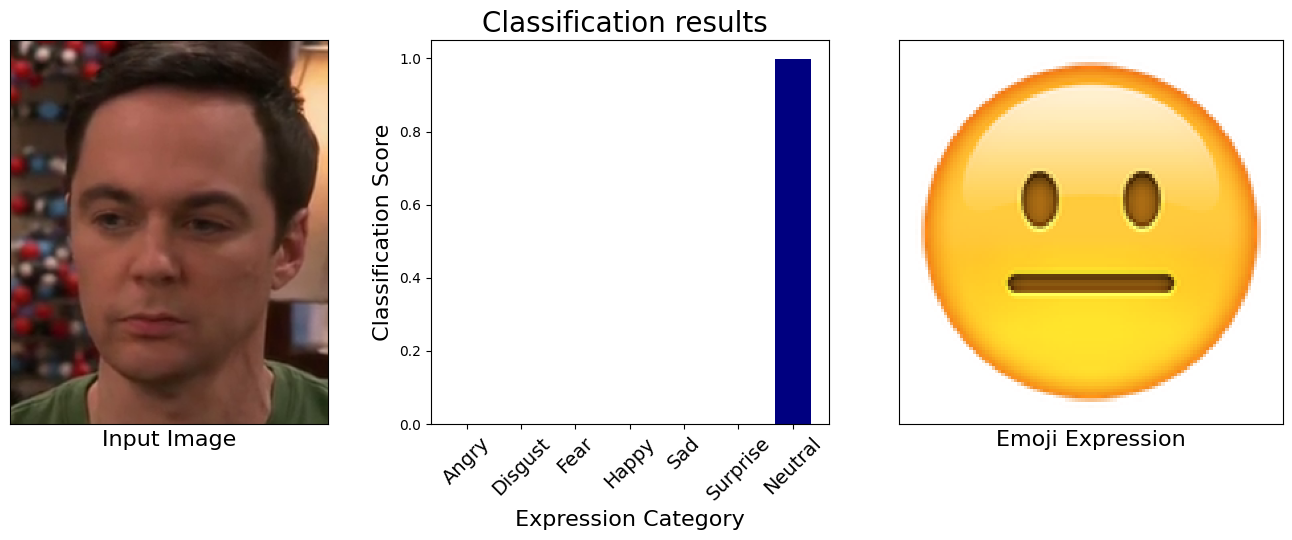

The Expression is Neutral


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable

import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *

cut_size = 44

transform_test = transforms.Compose([
    transforms.TenCrop(cut_size),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

raw_img = io.imread('images/1.png')
gray = rgb2gray(raw_img)
gray = resize(gray, (48,48), mode='symmetric').astype(np.uint8)

img = gray[:, :, np.newaxis]

img = np.concatenate((img, img, img), axis=2)
img = Image.fromarray(img)
inputs = transform_test(img)

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

net = VGG('VGG19')
checkpoint = torch.load(os.path.join('FER2013_VGG19', 'PrivateTest_model.t7'))
net.load_state_dict(checkpoint['net'])
net.cuda()
net.eval()

ncrops, c, h, w = np.shape(inputs)

inputs = inputs.view(-1, c, h, w)
inputs = inputs.cuda()
inputs = Variable(inputs, volatile=True)
outputs = net(inputs)

outputs_avg = outputs.view(ncrops, -1).mean(0)  # avg over crops

score = F.softmax(outputs_avg)
_, predicted = torch.max(outputs_avg.data, 0)

plt.rcParams['figure.figsize'] = (13.5,5.5)
axes=plt.subplot(1, 3, 1)
plt.imshow(raw_img)
plt.xlabel('Input Image', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()


plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)

plt.subplot(1, 3, 2)
ind = 0.1+0.6*np.arange(len(class_names))    
width = 0.4       
color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
for i in range(len(class_names)):
    plt.bar(ind[i], score.data.cpu().numpy()[i], width, color=color_list[i])
plt.title("Classification results ",fontsize=20)
plt.xlabel(" Expression Category ",fontsize=16)
plt.ylabel(" Classification Score ",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)

axes=plt.subplot(1, 3, 3)
emojis_img = io.imread('images/emojis/%s.png' % str(class_names[int(predicted.cpu().numpy())]))
plt.imshow(emojis_img)
plt.xlabel('Emoji Expression', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()
# show emojis

plt.show()
#plt.savefig(os.path.join('images/results/l.png'))
plt.close()

print("The Expression is %s" %str(class_names[int(predicted.cpu().numpy())]))



C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2491431013.py:51: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(inputs, volatile=True)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2491431013.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  score = F.softmax(outputs_avg)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\2491431013.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


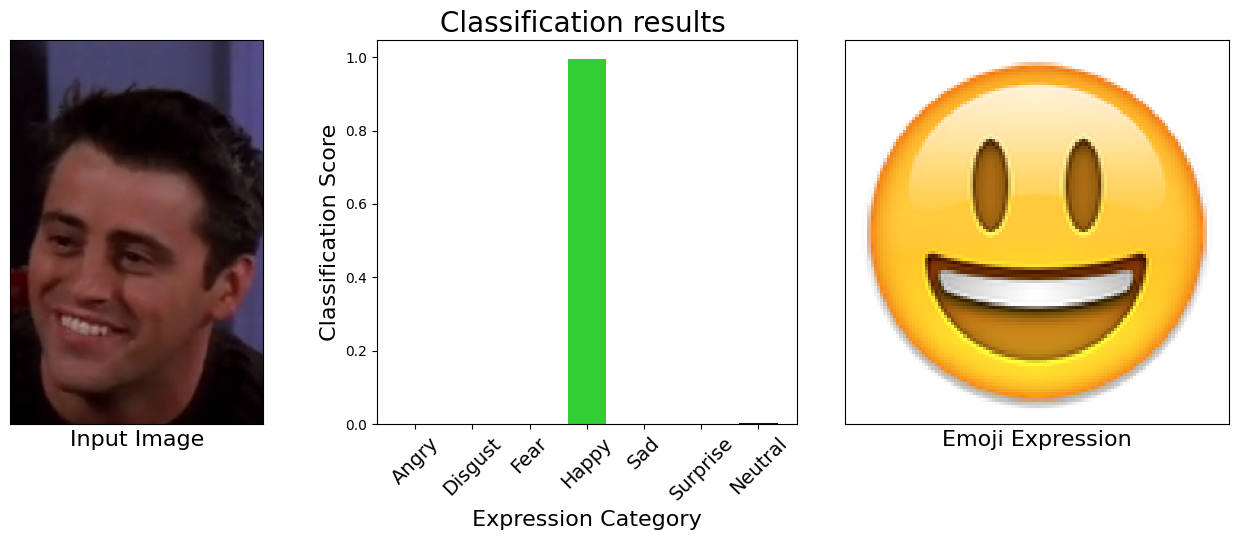

The Expression is Happy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable

import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *

cut_size = 44

transform_test = transforms.Compose([
    transforms.TenCrop(cut_size),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

raw_img = io.imread('images/2.png')
gray = rgb2gray(raw_img)
gray = resize(gray, (48,48), mode='symmetric').astype(np.uint8)

img = gray[:, :, np.newaxis]

img = np.concatenate((img, img, img), axis=2)
img = Image.fromarray(img)
inputs = transform_test(img)

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

net = VGG('VGG19')
checkpoint = torch.load(os.path.join('FER2013_VGG19', 'PrivateTest_model.t7'))
net.load_state_dict(checkpoint['net'])
net.cuda()
net.eval()

ncrops, c, h, w = np.shape(inputs)

inputs = inputs.view(-1, c, h, w)
inputs = inputs.cuda()
inputs = Variable(inputs, volatile=True)
outputs = net(inputs)

outputs_avg = outputs.view(ncrops, -1).mean(0)  

score = F.softmax(outputs_avg)
_, predicted = torch.max(outputs_avg.data, 0)

plt.rcParams['figure.figsize'] = (13.5,5.5)
axes=plt.subplot(1, 3, 1)
plt.imshow(raw_img)
plt.xlabel('Input Image', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()


plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)

plt.subplot(1, 3, 2)
ind = 0.1+0.6*np.arange(len(class_names))   
width = 0.4       
color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
for i in range(len(class_names)):
    plt.bar(ind[i], score.data.cpu().numpy()[i], width, color=color_list[i])
plt.title("Classification results ",fontsize=20)
plt.xlabel(" Expression Category ",fontsize=16)
plt.ylabel(" Classification Score ",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)

axes=plt.subplot(1, 3, 3)
emojis_img = io.imread('images/emojis/%s.png' % str(class_names[int(predicted.cpu().numpy())]))
plt.imshow(emojis_img)
plt.xlabel('Emoji Expression', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()
# show emojis

plt.show()
#plt.savefig(os.path.join('images/results/l.png'))
plt.close()

print("The Expression is %s" %str(class_names[int(predicted.cpu().numpy())]))



C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\3937212444.py:51: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(inputs, volatile=True)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\3937212444.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  score = F.softmax(outputs_avg)
C:\Users\vijet\AppData\Local\Temp\ipykernel_23416\3937212444.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


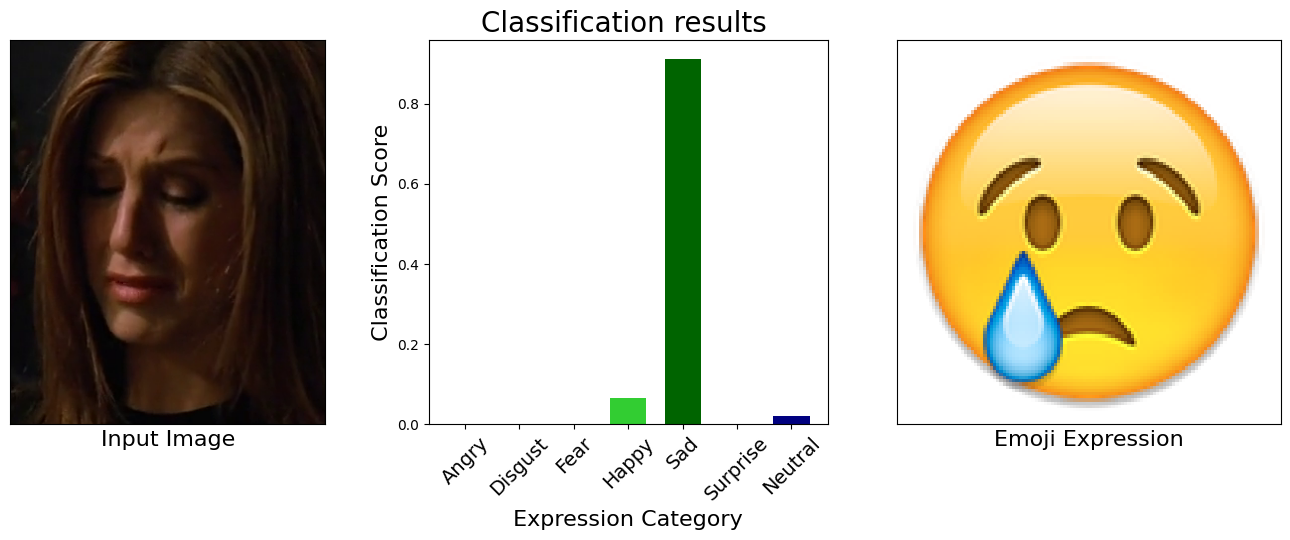

The Expression is Sad


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable

import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *

cut_size = 44

transform_test = transforms.Compose([
    transforms.TenCrop(cut_size),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

raw_img = io.imread('images/3.png')
gray = rgb2gray(raw_img)
gray = resize(gray, (48,48), mode='symmetric').astype(np.uint8)

img = gray[:, :, np.newaxis]

img = np.concatenate((img, img, img), axis=2)
img = Image.fromarray(img)
inputs = transform_test(img)

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

net = VGG('VGG19')
checkpoint = torch.load(os.path.join('FER2013_VGG19', 'PrivateTest_model.t7'))
net.load_state_dict(checkpoint['net'])
net.cuda()
net.eval()

ncrops, c, h, w = np.shape(inputs)

inputs = inputs.view(-1, c, h, w)
inputs = inputs.cuda()
inputs = Variable(inputs, volatile=True)
outputs = net(inputs)

outputs_avg = outputs.view(ncrops, -1).mean(0)  

score = F.softmax(outputs_avg)
_, predicted = torch.max(outputs_avg.data, 0)

plt.rcParams['figure.figsize'] = (13.5,5.5)
axes=plt.subplot(1, 3, 1)
plt.imshow(raw_img)
plt.xlabel('Input Image', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()


plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)

plt.subplot(1, 3, 2)
ind = 0.1+0.6*np.arange(len(class_names))    
width = 0.4       
color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
for i in range(len(class_names)):
    plt.bar(ind[i], score.data.cpu().numpy()[i], width, color=color_list[i])
plt.title("Classification results ",fontsize=20)
plt.xlabel(" Expression Category ",fontsize=16)
plt.ylabel(" Classification Score ",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)

axes=plt.subplot(1, 3, 3)
emojis_img = io.imread('images/emojis/%s.png' % str(class_names[int(predicted.cpu().numpy())]))
plt.imshow(emojis_img)
plt.xlabel('Emoji Expression', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])
plt.tight_layout()
# show emojis

plt.show()
#plt.savefig(os.path.join('images/results/l.png'))
plt.close()

print("The Expression is %s" %str(class_names[int(predicted.cpu().numpy())]))

